In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('combined_file_7.csv')
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,NaN,NaN,https://dmitrov.cian.ru/sale/flat/302089986/,Дмитров,sale,flat,14.0,14.0,2.0,57.41,...,-1.0,-1,-1,-1,7.499285e+10,NaN,NaN,NaN,NaN,Шоколад
1,Мир Недвижимости,real_estate_agent,https://dmitrov.cian.ru/sale/flat/287505029/,Дмитров,sale,flat,1.0,4.0,2.0,49.6,...,-1.0,-1,"27,2 м²",9 м²,7.909990e+10,Дмитров,Рогачевская,35,NaN,NaN
2,ID 96159343,unknown,https://dmitrov.cian.ru/sale/flat/308835389/,Дмитров,sale,flat,3.0,3.0,2.0,30.0,...,-1.0,-1,-1,7 м²,7.962360e+10,Дмитров,Профессиональная,4,NaN,NaN
3,NaN,NaN,https://dmitrov.cian.ru/sale/flat/303301701/,Дмитров,sale,flat,14.0,14.0,2.0,55.63,...,-1.0,-1,-1,-1,7.499285e+10,NaN,NaN,NaN,NaN,Шоколад
4,Мир Недвижимости,real_estate_agent,https://dmitrov.cian.ru/sale/flat/296193586/,Дмитров,sale,flat,1.0,12.0,2.0,54.5,...,-1.0,-1,"33,2 м²","10,2 м²",7.909990e+10,Дмитров,Московская,21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,ID 12620057,unknown,https://balashikha.cian.ru/sale/flat/305354679/,Балашиха,sale,flat,9.0,17.0,4.0,103.0,...,-1.0,-1,"66,2 м²","12,5 м²",7.916725e+10,NaN,Брагина,1,Кучино,Леоновский парк
5877,Дом Гончарова,real_estate_agent,https://balashikha.cian.ru/sale/flat/305178861/,Балашиха,sale,flat,18.0,22.0,4.0,100.0,...,-1.0,-1,-1,10 м²,7.965107e+10,NaN,Летная,08,Салтыковская,NaN
5878,ID 348616,homeowner,https://balashikha.cian.ru/sale/flat/272145264/,Балашиха,sale,flat,8.0,12.0,4.0,74.0,...,-1.0,-1,46 м²,10 м²,7.966061e+10,NaN,Твардовского,19,Перово,NaN
5879,ID 27112,real_estate_agent,https://balashikha.cian.ru/sale/flat/289251717/,Балашиха,sale,flat,3.0,5.0,4.0,61.2,...,-1.0,-1,"44,3 м²","5,3 м²",7.985963e+10,NaN,Гагарина,6,Железнодорожная,NaN


In [81]:
df.shape

(5881, 24)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                5780 non-null   object 
 1   author_type           5777 non-null   object 
 2   url                   5878 non-null   object 
 3   location              5878 non-null   object 
 4   deal_type             5881 non-null   object 
 5   accommodation_type    5881 non-null   object 
 6   floor                 5881 non-null   float64
 7   floors_count          5881 non-null   float64
 8   rooms_count           5881 non-null   float64
 9   total_meters          5881 non-null   object 
 10  price                 5854 non-null   float64
 11  year_of_construction  5881 non-null   object 
 12  object_type           5878 non-null   float64
 13  house_material_type   5878 non-null   object 
 14  heating_type          5878 non-null   float64
 15  finish_type          

In [83]:
df.columns[df.isna().any()].tolist() #смотрю колонки с пропущенными значениями

['author',
 'author_type',
 'url',
 'location',
 'price',
 'object_type',
 'house_material_type',
 'heating_type',
 'finish_type',
 'living_meters',
 'kitchen_meters',
 'phone',
 'district',
 'street',
 'house_number',
 'underground',
 'residential_complex']

<Axes: xlabel='price', ylabel='location'>

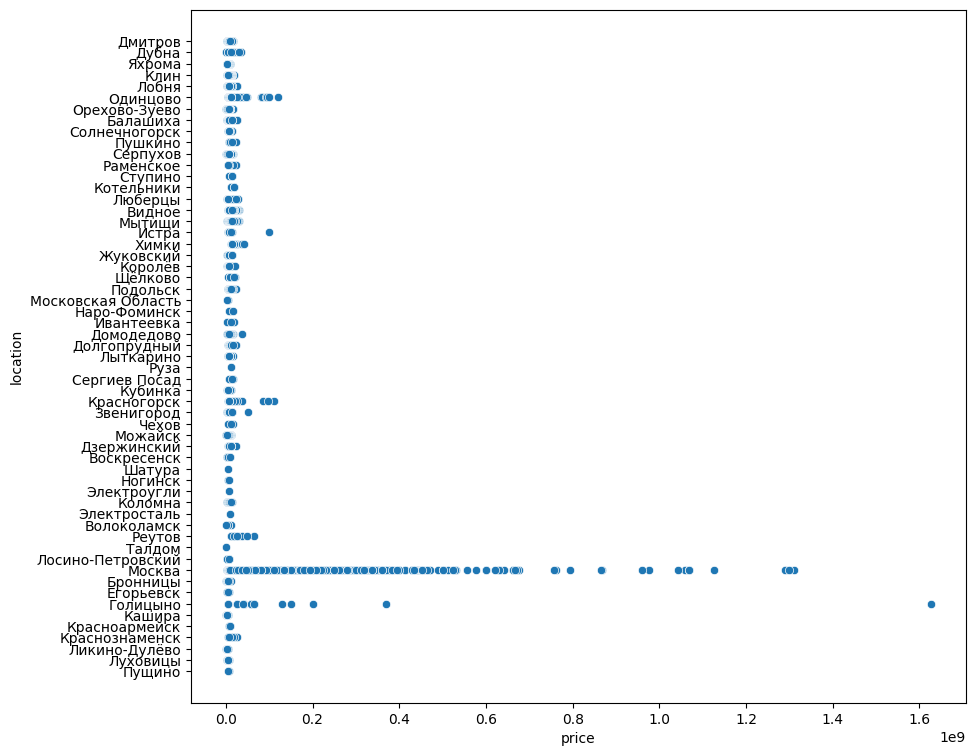

In [84]:
plt.figure(figsize=(10, 9))
sns.scatterplot(data=df, x="price", y="location")

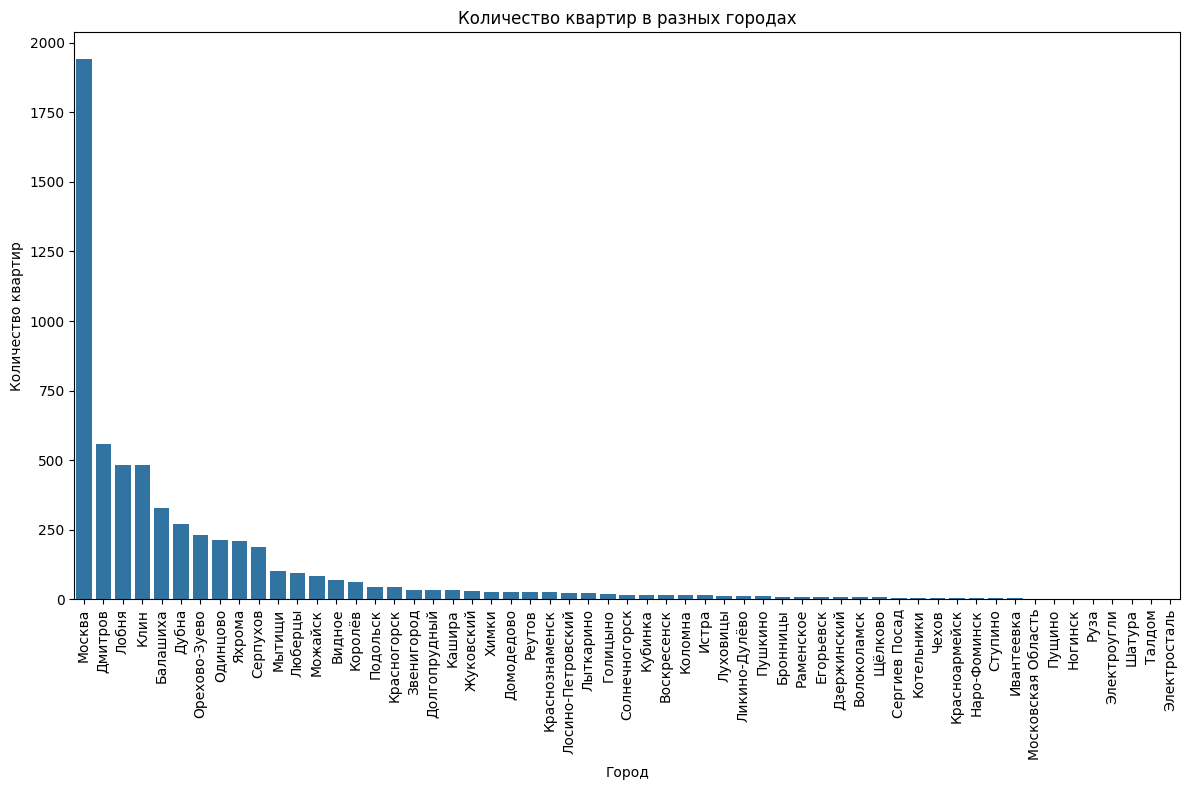

In [86]:
plt.figure(figsize=(12, 8))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index)
plt.title('Количество квартир в разных городах')
plt.xlabel('Город')
plt.ylabel('Количество квартир')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

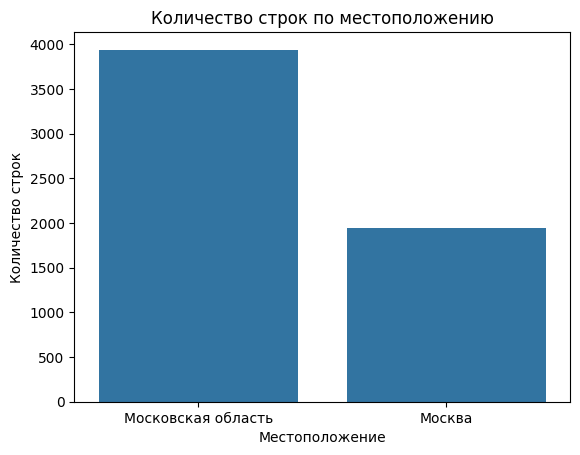

In [87]:
# создаем новую переменную, которая будет принимать значения "Москва" и "Московская область"
df['location_new'] = df['location'].apply(lambda x: 'Москва' if x == 'Москва' else 'Московская область')

# создаем график
sns.countplot(x='location_new', data=df)

# добавляем лейблы
plt.title('Количество строк по местоположению')
plt.xlabel('Местоположение')
plt.ylabel('Количество строк')

# отображаем график
plt.show()